${\bf \underline {Statistical~tests}}$

${\bf Kolmogorov-Smirnov}$:

"The Kolmogorov–Smirnov test may also be used to test whether two underlying one-dimensional probability distributions differ."

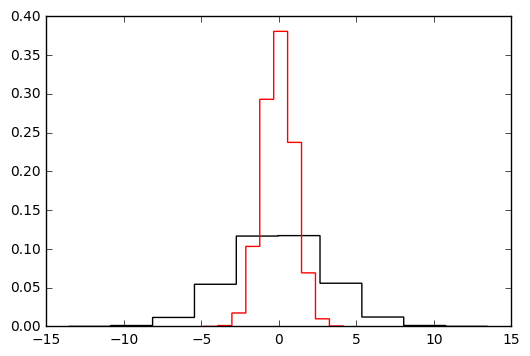

In [103]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

x=np.random.normal(0,3,100000)
y=np.random.normal(0,1,100000)
#y=np.random.uniform(-,-3,1000)

plt.hist(x,histtype='step',normed=True, label='x', color='black')
plt.hist(y,histtype='step',normed=True, label='y', color='red')
plt.show()



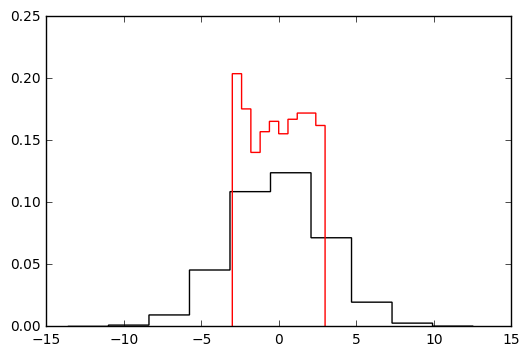

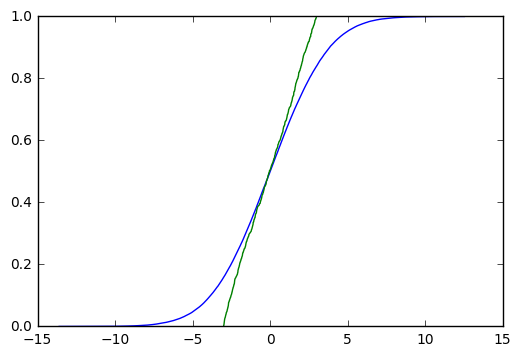

Ks_2sampResult(statistic=0.16156000000000004, pvalue=4.7573536942134527e-23)


In [111]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

x=np.random.normal(0,3,100000)
y=np.random.normal(0,1,100000)
y=np.random.uniform(-3,3,1000)

plt.hist(x,histtype='step',normed=True, label='x', color='black')
plt.hist(y,histtype='step',normed=True, label='y', color='red')
plt.show()

x.sort()
y.sort()
xx=[float(i)/len(x) for i in range(len(x))]
yy=[float(i)/len(y) for i in range(len(y))]
plt.plot(x,xx,)
plt.plot(y,yy,)
plt.show()
print scipy.stats.ks_2samp(x,y)


maximum difference= 0.15985


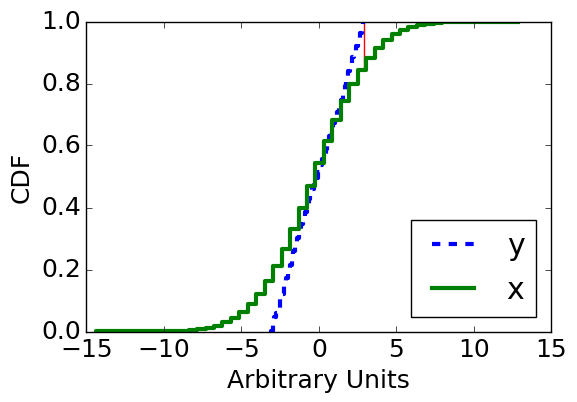

Ks_2sampResult(statistic=0.15989999999999999, pvalue=1.3800194318366433e-22)


In [122]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import matplotlib as mpl

x=np.random.normal(0,3,100000)
y=np.random.normal(0,1,100000)
y=np.random.uniform(-3,3,1000)



def plot_cdf(x_data,y_data):
    ecdf = sm.distributions.ECDF(x_data)
    x = np.linspace(min(x_data), max(x_data))
    x = np.array([x[0]-(x[1]-x[0])]+list(x))
    y = ecdf(x)
    
    ecdf2 = sm.distributions.ECDF(y_data)
    x2 = np.linspace(min(y_data), max(y_data))
    x2 = np.array([x2[0]-(x2[1]-x2[0])]+list(x2))
    y2 = ecdf2(x2)
    ax = plt.subplot(1,1,1)
    plt.plot(x2, y2, linestyle='--', drawstyle='steps',label="y", linewidth=3)
    plt.step(x, y, label="x", linewidth=3)
    
    # give sup
    a = list(x)
    b = list(x2)
    c = a + b
    ecdfc1 = ecdf(c)
    ecdfc2 = ecdf2(c)
    diffs = []
    for i,cc in enumerate(c):
        diff = abs(ecdfc1[i]-ecdfc2[i])
        diffs.append(diff)
    maxind = diffs.index(max(diffs))
    maxxpos = c[maxind]-(x2[1]-x2[0])*0.6
    maxymin = min(ecdfc2[maxind],ecdfc1[maxind])
    maxdiff = max(diffs)
    print "maximum difference=", maxdiff
    font = {'size'   : 18}
    mpl.rc('font', **font)
    plt.arrow( maxxpos, maxymin, 0.0, maxdiff, fc="r", ec="r", head_width=0.01, head_length=0.00)
    ax.set_ylabel('CDF')
    ax.set_xlabel('Arbitrary Units')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=4)
    plt.show()

if __name__ == "__main__":
    x_data = x
    y_data =y
    plot_cdf(x_data,y_data)
    #KS test
    print scipy.stats.ks_2samp(x_data, y_data)

For the maximum distance we can calculate the probability of rejecting the null hypothesis:

$D_{nm}=c(\alpha)\sqrt{\frac{n+m}{nm}}$, where $c(\alpha)=\sqrt{-\frac{1}{2}\ln\frac{\alpha}{2}}$

Then the probability is:

$\alpha=\exp{(\ln 2 - \frac{2D^2nm}{n+m})}$

maximum difference= 0.09824 probability= 0.0


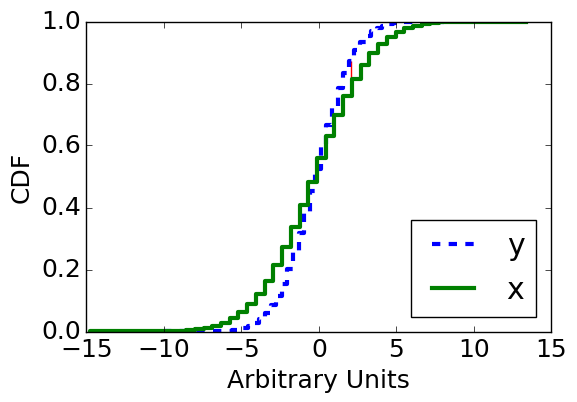

Ks_2sampResult(statistic=0.09861999999999993, pvalue=0.0)


In [308]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import matplotlib as mpl

x=np.random.normal(0,3,100000)
y=np.random.normal(0,2,100000)
#y=np.random.uniform(-3,3,1000)



def plot_cdf(x_data,y_data):
    ecdf = sm.distributions.ECDF(x_data)
    x = np.linspace(min(x_data), max(x_data))
    x = np.array([x[0]-(x[1]-x[0])]+list(x))
    y = ecdf(x)
    
    ecdf2 = sm.distributions.ECDF(y_data)
    x2 = np.linspace(min(y_data), max(y_data))
    x2 = np.array([x2[0]-(x2[1]-x2[0])]+list(x2))
    y2 = ecdf2(x2)
    ax = plt.subplot(1,1,1)
    plt.plot(x2, y2, linestyle='--', drawstyle='steps',label="y", linewidth=3)
    plt.step(x, y, label="x", linewidth=3)
    
    # give sup
    a = list(x)
    b = list(x2)
    c = a + b
    ecdfc1 = ecdf(c)
    ecdfc2 = ecdf2(c)
    diffs = []
    for i,cc in enumerate(c):
        diff = abs(ecdfc1[i]-ecdfc2[i])
        diffs.append(diff)
    maxind = diffs.index(max(diffs))
    maxxpos = c[maxind]-(x2[1]-x2[0])*0.6
    maxymin = min(ecdfc2[maxind],ecdfc1[maxind])
    maxdiff = max(diffs)
    a=np.exp(np.log(2)-(2*len(x_data)*len(y_data)*(maxdiff**2))/(len(x_data)+len(y_data)))
    print "maximum difference=", maxdiff, 'probability=',a
    font = {'size'   : 18}
    mpl.rc('font', **font)
    plt.arrow( maxxpos, maxymin, 0.0, maxdiff, fc="r", ec="r", head_width=0.01, head_length=0.00)
    ax.set_ylabel('CDF')
    ax.set_xlabel('Arbitrary Units')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=4)
    plt.show()

if __name__ == "__main__":
    x_data = x
    y_data =y
    plot_cdf(x_data,y_data)
    #KS test
    print scipy.stats.ks_2samp(x_data, y_data)

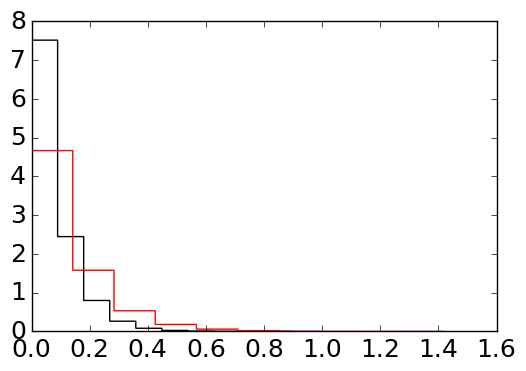

Ks_2sampResult(statistic=0.17739000000000005, pvalue=0.0)


In [145]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math

x_mean=0.08
y_mean=0.13

x=np.random.exponential(x_mean,100000)
y=np.random.exponential(y_mean,100000)

bb=10
plt.hist(x,bins=bb,histtype='step',normed=True, label='x', color='black')
plt.hist(y,bins=bb,histtype='step',normed=True, label='y', color='red')
plt.show()

print scipy.stats.ks_2samp(x, y)


$ \bf Mann–Whitney~U~test$ or $\bf Wilcoxon~rank~sum~test$

"The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample."

"Unlike the t-test it does not require the assumption of normal distributions. It is nearly as efficient as the t-test on normal distributions."


The null hypothesis for the Wicoxon test is:  P(X>Y)=P(X<Y)

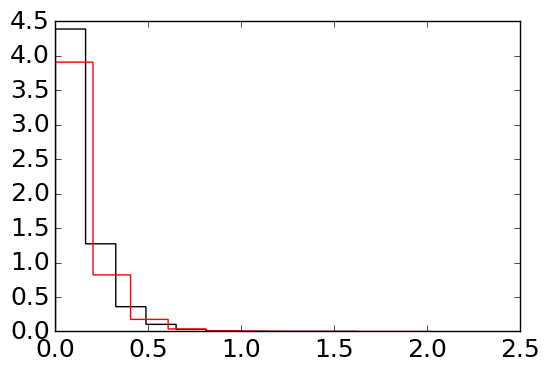

Ks_2sampResult(statistic=0.0034399999999999986, pvalue=0.59425924362175209)
RanksumsResult(statistic=0.43684455083776197, pvalue=0.66222408720131987)


In [174]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math

x_mean=0.13
y_mean=0.13

x=np.random.exponential(x_mean,100000)
y=np.random.exponential(y_mean,100000)

bb=10
plt.hist(x,bins=bb,histtype='step',normed=True, label='x', color='black')
plt.hist(y,bins=bb,histtype='step',normed=True, label='y', color='red')
plt.show()

print scipy.stats.ks_2samp(x, y)
print scipy.stats.ranksums(x,y)

$ \bf Anderson–Darling~test$

"The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. In its basic form, the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free." 


$A=n\int_{-\infty}^{\infty}\frac{(F_n(x)-F(x))^2}{F(x)(1-F(x))} dF(x)$

In [186]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math

x=np.random.uniform(0,3,1000)
y=np.random.normal(0,1,100000)

result=scipy.stats.anderson(y,dist='norm')
print "Anderson statistic=", result[0]
print "Critical values=", result[1]
print "Significance level=", result[2]

Anderson statistic= 0.371532969817
Critical values= [ 0.576  0.656  0.787  0.918  1.092]
Significance level= [ 15.   10.    5.    2.5   1. ]


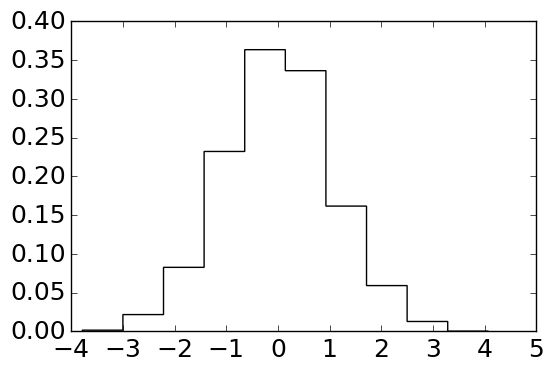

Anderson statistic= 6.56475163482
Critical values= [ 0.571  0.651  0.781  0.911  1.083]
Significance level= [ 15.   10.    5.    2.5   1. ]


In [304]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math

x=np.random.uniform(-3,3,500)
y=np.random.normal(0,1,9500)

z=[]
z.extend(x)
z.extend(y)

plt.hist(z,histtype='step',normed=True, label='x', color='black')
plt.show()

result=scipy.stats.anderson(x,dist='norm')
print "Anderson statistic=", result[0]
print "Critical values=", result[1]
print "Significance level=", result[2]

$\rm \bf Anderson-Darling~test~for~k-samples$.

"The k-sample Anderson-Darling test is a modification of the one-sample Anderson-Darling test. It tests the null hypothesis that k-samples are drawn from the same population without having to specify the distribution function of that population. The critical values depend on the number of samples."

In [223]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math
import random

z=np.random.uniform(-3,3,100000)
k=np.random.normal(0,1,100000)
z.sort()
x=[random.choice(z) for i in range(1000)]
y=[random.choice(k) for i in range(100)]

zz=np.array([np.array(x),np.array(y)])

result=scipy.stats.anderson_ksamp(zz)
print "Significance level Anderson-darling test=", result[2]
print scipy.stats.ks_2samp(x, y)
print scipy.stats.ranksums(x,y)


Significance level Anderson-darling test= 4.60251372813e-05
Ks_2sampResult(statistic=0.23499999999999999, pvalue=6.5943267133946354e-05)
RanksumsResult(statistic=0.31462256268142769, pvalue=0.75304824600278386)


$\rm \bf Pearson~correlation~test:$

"The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets."


$r=\frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n(x_i-\overline{x})^2}\sqrt{\sum_{i=1}^n(y_i-\overline{y})^2}}$

(1.0, 0.0)


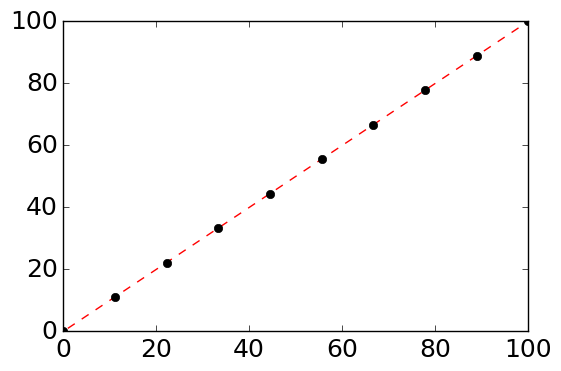

In [233]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math
import random


x=np.linspace(0,100,10)
y=x
print scipy.stats.pearsonr(x,y)
xx=np.arange(1,101,1)
yy=xx
plt.plot(xx,yy,'r--')
plt.plot(x,y,"ko")
plt.show()



(0.99248677761971438, 1.3815356240556099e-08)


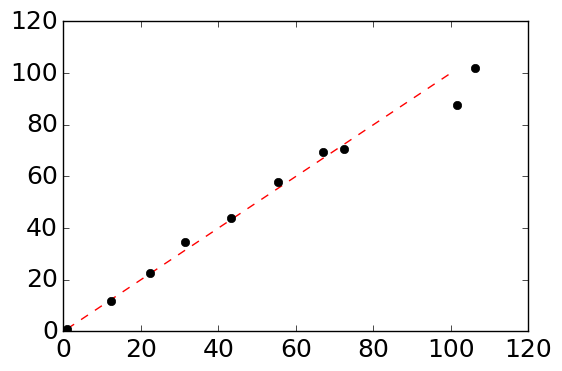

In [310]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math
import random


z=np.linspace(1,100,10)
percentage_err=0.05
xx=np.arange(1,101,1)
yy=xx
plt.plot(xx,yy,'r--')
x=[np.random.normal(nn,nn*percentage_err) for nn in z]
y=[np.random.normal(nn,nn*percentage_err) for nn in z]
print scipy.stats.pearsonr(x,y)

plt.plot(x,y,"ko")
plt.show()

(-0.70612134618959999, 0.022474487141231441)


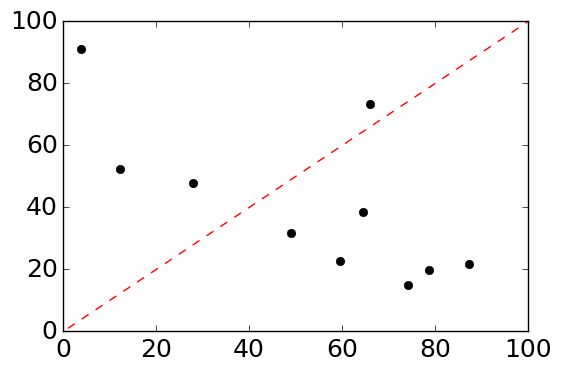

In [248]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math
import random


x=np.random.uniform(0,100,10)
y=np.random.uniform(0,100,10)
xx=np.arange(1,101,1)
yy=xx
plt.plot(xx,yy,'r--')

print scipy.stats.pearsonr(x,y)

plt.plot(x,y,"ko")
plt.show()

(0.56531527556076377, 0.069931066218785184)


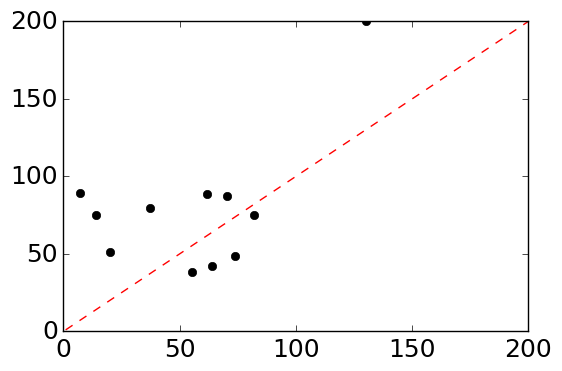

In [312]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math
import random


x=np.random.uniform(0,100,10)
y=np.random.uniform(0,100,10)

x=np.append(x, [[130]])
y=np.append(y, [[200]])
xx=np.arange(1,201,1)
yy=xx
plt.plot(xx,yy,'r--')

print scipy.stats.pearsonr(x,y)

plt.plot(x,y,"ko")
plt.show()

$\rm \bf Spearman~correlation~test:$

"The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. "

$\rho=\frac{\sum_{i=1} ^n (x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1} ^n (x_i-\overline{x})^2\sum_{i=1} ^n (y_i-\overline{y})^2}}$

(0.65949191331312251, 0.027270834138570472)
SpearmanrResult(correlation=0.40909090909090912, pvalue=0.21154501034209611)


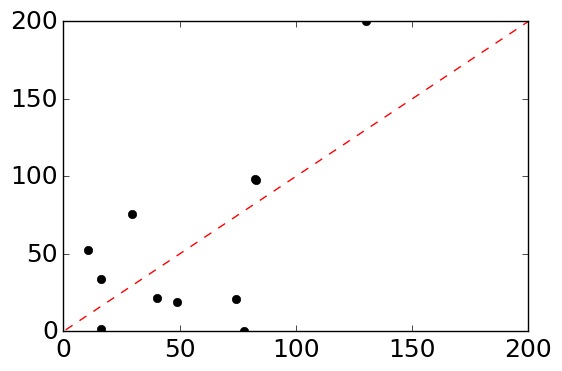

In [311]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math
import random


x=np.random.uniform(0,100,10)
y=np.random.uniform(0,100,10)

x=np.append(x, [[130]])
y=np.append(y, [[200]])
xx=np.arange(1,201,1)
yy=xx
plt.plot(xx,yy,'r--')

print scipy.stats.pearsonr(x,y)
print scipy.stats.spearmanr(x,y)
plt.plot(x,y,"ko")
plt.show()

$\bf Kendall~rank~correlation~coefficient $

"In statistics, the Kendall rank correlation coefficient is a statistic used to measure the ordinal association between two measured quantities." 

$\tau = \frac{(number~of~concordant~pairs)-(number~of~disconcordant~pairs)}{n(n-1)/2}$

$z_A=\frac{3((number~of~concordant~pairs)-(number~of~disconcordant~pairs))}{\sqrt{n(n-1)(2n+5)/2}}$

"Thus, to test whether two variables are statistically dependent, one computes $z_A$, and finds the cumulative probability for a standard normal distribution at $− | z_A |$. For a 2-tailed test, multiply that number by two to obtain the p-value. If the p-value is below a given significance level, one rejects the null hypothesis (at that significance level) that the quantities are statistically independent."

(0.60778074525001569, 0.047300453577959214)
SpearmanrResult(correlation=0.20909090909090913, pvalue=0.53722093521132286)
KendalltauResult(correlation=0.16363636363636364, pvalue=0.48352207150460691)


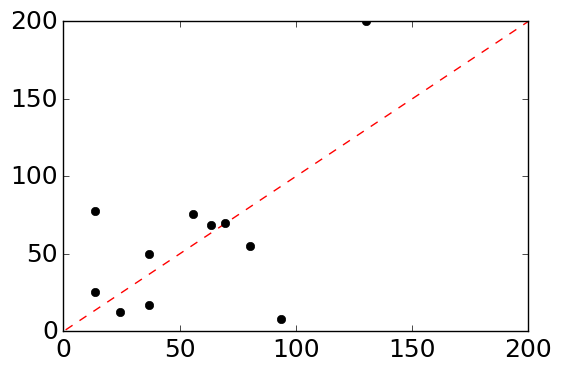

In [313]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import math
import random


x=np.random.uniform(0,100,10)
y=np.random.uniform(0,100,10)

x=np.append(x, [[130]])
y=np.append(y, [[200]])
xx=np.arange(1,201,1)
yy=xx
plt.plot(xx,yy,'r--')

print scipy.stats.pearsonr(x,y)
print scipy.stats.spearmanr(x,y)
print scipy.stats.kendalltau(x,y)
plt.plot(x,y,"ko")
plt.show()

"Spearman test $\rho$ can be thought of as the regular Pearson product-moment correlation coefficient; that is, in terms of the proportion of variability accounted for, except that Spearman $\rho$ is computed from ranks. Spearman $\rho$ assumes that the variables under consideration were measured on at least an ordinal (rank order) scale; that is, the individual observations (cases) can be ranked into two ordered series."

"Kendall $\tau$ is equivalent to Spearman $\rho$ with regard to the underlying assumptions. It is also comparable in terms of its statistical power. However, Spearman $\rho$ and Kendall $\tau$ are usually not identical in magnitude because their underlying logic as well as their computational formulas are very different. More importantly, Kendall $\tau$ and Spearman $\rho$ imply different interpretations: Spearman $\rho$ can be thought of as the regular Pearson product-moment correlation coefficient; that is, in terms of proportion of variability accounted for, except that Spearman $\rho$ is computed from ranks. Kendall $\tau$, on the other hand, represents a probability; that is, it is the difference between the probability that the two variables are in the same order in the observed data versus the probability that the two variables are in different orders."